In [1]:
! pip install git+https://github.com/nizhib/pytorch-insightface

  Cloning https://github.com/nizhib/pytorch-insightface to /tmp/pip-req-build-67oxl1k8
  Running command git clone -q https://github.com/nizhib/pytorch-insightface /tmp/pip-req-build-67oxl1k8
  Created wheel for insightface: filename=insightface-0.1.0+b353a34-cp37-none-any.whl size=4279 sha256=b5703c3957b1efee31d36ef307ff7b8adad9bc52bb3508a47e6ff14829a69b5b
  Stored in directory: /tmp/pip-ephem-wheel-cache-0x8f4vib/wheels/10/e7/5a/648c05950e72cdf4d184d44d74e6a94297aa5f9b529f05ad06
Successfully built insightface


In [2]:
import torch
from imageio import imread
from torchvision import transforms

In [3]:
import insightface

In [31]:
import matplotlib.pyplot as plt

In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [37]:
device

device(type='cuda', index=0)

In [38]:
embedder = insightface.iresnet100(pretrained=True)
embedder.eval()

IResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
  (prelu): PReLU(num_parameters=64)
  (layer1): Sequential(
    (0): IBasicBlock(
      (bn1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
      (prelu): PReLU(num_parameters=64)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn3): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
      )
    )
    (1): IBas

In [39]:
embedder.to(device)

IResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
  (prelu): PReLU(num_parameters=64)
  (layer1): Sequential(
    (0): IBasicBlock(
      (bn1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
      (prelu): PReLU(num_parameters=64)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn3): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
      (downsample): Sequential(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(64, eps=2e-05, momentum=0.9, affine=True, track_running_stats=True)
      )
    )
    (1): IBas

In [41]:
mean = [0.5] * 3
std = [0.5 * 256 / 255] * 3
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((112,112)),
    transforms.Normalize(mean, std)
])


In [26]:
face = imread('/content/drive/MyDrive/GlassesDetection/example_data_glasses/without_glasses/0.jpg')

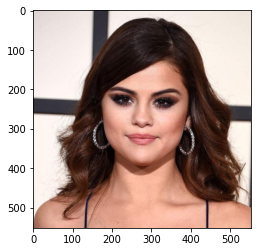

In [34]:
plt.imshow(face)

In [42]:
tensor = preprocess(face)

In [55]:
#tensor.unsqueeze(0).to(device)

In [49]:
tensor.shape

torch.Size([3, 112, 112])

In [56]:
with torch.no_grad():
  features = embedder(tensor.unsqueeze(0).to(device))[0]



In [57]:
print(features[:5])

tensor([-1.0566, -0.5219,  0.1481, -0.0243,  0.2278], device='cuda:0')


In [58]:
#pip install opencv-python numpy easydict Cython progressbar2 torch tensorboardX

     |████████████████████████████████| 122kB 5.6MB/s 


In [60]:
!git clone https://github.com/faciallab/FaceDetector.git

Cloning into 'FaceDetector'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 1027 (delta 0), reused 1 (delta 0), pack-reused 1020
Receiving objects: 100% (1027/1027), 40.97 MiB | 23.43 MiB/s, done.
Resolving deltas: 100% (656/656), done.


In [61]:
! pwd

/content


In [69]:
!cd /content/FaceDetector

In [70]:
!ls

drive  FaceDetector  sample_data


In [71]:
!cd /content/FaceDetector && python setup.py build_ext --inplace

running build_ext
skipping 'mtcnn/utils/nms/cpu_nms.c' Cython extension (up-to-date)
skipping 'mtcnn/utils/nms/gpu_nms.cpp' Cython extension (up-to-date)
building 'mtcnn.utils.nms.cpu_nms' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/mtcnn
creating build/temp.linux-x86_64-3.7/mtcnn/utils
creating build/temp.linux-x86_64-3.7/mtcnn/utils/nms
{'gcc': ['-Wno-cpp', '-Wno-unused-function']}
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I/usr/include/python3.7m -c mtcnn/utils/nms/cpu_nms.c -o build/temp.linux-x86_64-3.7/mtcnn/utils/nms/cpu_nms.o -Wno-cpp

In [73]:
!cd /content/FaceDetector && python setup.py install

running install
running build
running build_py
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/mtcnn
copying mtcnn/__init__.py -> build/lib.linux-x86_64-3.7/mtcnn
creating build/lib.linux-x86_64-3.7/mtcnn/datasets
copying mtcnn/datasets/__init__.py -> build/lib.linux-x86_64-3.7/mtcnn/datasets
copying mtcnn/datasets/wider_face.py -> build/lib.linux-x86_64-3.7/mtcnn/datasets
copying mtcnn/datasets/celeba.py -> build/lib.linux-x86_64-3.7/mtcnn/datasets
creating build/lib.linux-x86_64-3.7/mtcnn/deploy
copying mtcnn/deploy/__init__.py -> build/lib.linux-x86_64-3.7/mtcnn/deploy
copying mtcnn/deploy/detect.py -> build/lib.linux-x86_64-3.7/mtcnn/deploy
copying mtcnn/deploy/align.py -> build/lib.linux-x86_64-3.7/mtcnn/deploy
copying mtcnn/deploy/tracker.py -> build/lib.linux-x86_64-3.7/mtcnn/deploy
copying mtcnn/deploy/batch_detect.py -> build/lib.linux-x86_64-3.7/mtcnn/deploy
creating build/lib.linux-x86_64-3.7/mtcnn/network
copying mtcnn/network/__init__.py -> build/li

In [74]:
import cv2
import mtcnn

In [75]:
# First we create pnet, rnet, onet, and load weights from caffe model.
pnet, rnet, onet = mtcnn.get_net_caffe('output/converted')

/usr/local/lib/python3.7/dist-packages/mtcnn/network/mtcnn_pytorch.py:9: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(m.weight.data)
/usr/local/lib/python3.7/dist-packages/mtcnn/network/mtcnn_pytorch.py:10: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(m.bias, 0.1)


In [76]:
# Then we create a detector
detector = mtcnn.FaceDetector(pnet, rnet, onet, device='cuda:0')

In [106]:
# Then we can detect faces from image
img = '/content/drive/MyDrive/GlassesDetection/example_data_glasses/with_glasses/16.jpg'
boxes, landmarks = detector.detect(img)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3458: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


In [107]:
# Then we draw bounding boxes and landmarks on image
image = cv2.imread(img)
image = mtcnn.utils.draw.draw_boxes2(image, boxes)
image = mtcnn.utils.draw.batch_draw_landmarks(image, landmarks)

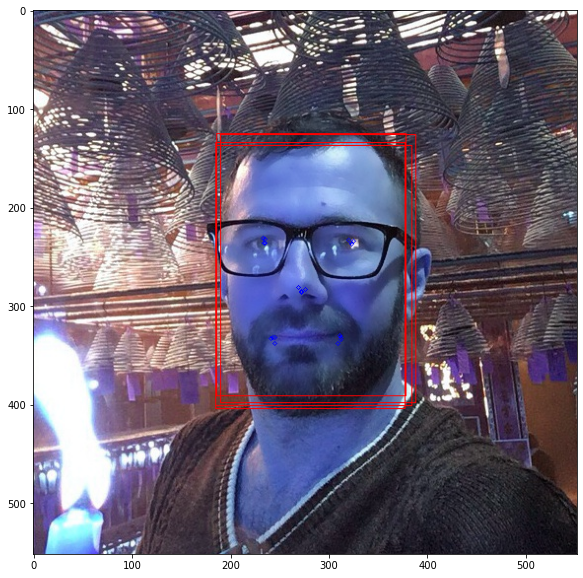

In [108]:
# Show the result
plt.figure(figsize=(20,10))
plt.imshow(image)